In [ ]:
import sys
import ast
print(sys.executable)
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re
import torch
import numpy as np
import pandas as pd
# 1.nr 2.nid 3.er 4.eid

/usr/bin/python3


In [ ]:
!wget https://github.com/519045752/TagSim/raw/master/IMDB.zip
!unzip /content/IMDB.zip

--2022-11-05 13:41:10--  https://github.com/519045752/TagSim/raw/master/IMDB.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/519045752/TagSim/master/IMDB.zip [following]
--2022-11-05 13:41:11--  https://raw.githubusercontent.com/519045752/TagSim/master/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579001 (2.5M) [application/zip]
Saving to: ‘IMDB.zip’

IMDB.zip            100%[===================>]   2.46M  --.-KB/s    in 0.07s   

2022-11-05 13:41:11 (36.6 MB/s) - ‘IMDB.zip’ saved [2579001/2579001]

Archive:  /content/IMDB.zip
   creating: generated/
  inflating: generated/0_NR_0

In [ ]:
DATASET = "IMDB"
ORI_DIR = "/content/original"
GEN_DIR ="/content/generated"
TEST_DIR = "/content/test"
TEST_GEN_DIR = "/content/test_gen"
DATASET_FOLDER = "/content"

In [ ]:
# test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
#                                                                           index=False)
def load_pairs():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[1],ged[3]]
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        gt_ged = row['gt_ged']
        if gt_ged<=10:
          graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
          graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
          test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
        else:
          continue
        
    return train_pairs, test_pairs
train_pairs, test_pairs = load_pairs()
print(len(train_pairs))
print(train_pairs[0])
print(len(test_pairs))
print(test_pairs[0])

1200
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7fc87fb8d690>, <networkx.classes.graph.Graph object at 0x7fc87fb6c090>], 'ged': [5, 3], 'gt_ged': 8}
42
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7fc87667e850>, <networkx.classes.graph.Graph object at 0x7fc8765c6210>], 'gt_ged': 0.0}


In [ ]:
def getFileInfo(filename):
    # if test is False:
    #     g = nx.read_gexf(path="./dataset/"+datasetName+ + filename)
    # else:
    # draw(g)
    reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
    ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
    nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
    nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
    er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
    eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
    gev = nr + nid + er + eid
    # return [ori+'.gexf',str(nr)+str(nid)+str(er)+str(eid)]
    return [ori + '.gexf', [nr, nid, er, eid]]
    # print('ori',ori, 'nr',nr, 'nid',nid, 'er',er, 'eid',eid,'gev',gev)


ori, ged = getFileInfo("4_NR_0_NID_4_ER_2_EID_5.gexf")
print(ori, ged)
print(sum(ged))

4.gexf [0, 4, 2, 5]
11


#Baseline Model


-------Model training---------.

Iteration 0 loss:  0.11018319427967072
Iteration 1 loss:  0.09984652698040009
Iteration 2 loss:  0.08722016215324402
Iteration 3 loss:  0.09221681207418442
Iteration 4 loss:  0.0782439112663269
Iteration 5 loss:  0.08341006189584732
Iteration 6 loss:  0.07572915405035019
Iteration 7 loss:  0.07510058581829071
Iteration 8 loss:  0.07164959609508514
Iteration 9 loss:  0.05708879232406616
Iteration 10 loss:  0.06109593063592911
Iteration 11 loss:  0.057538386434316635
Iteration 12 loss:  0.05602240934967995
Iteration 13 loss:  0.05730471387505531
Iteration 14 loss:  0.05501822754740715
Iteration 15 loss:  0.05407807230949402
Iteration 16 loss:  0.049935631453990936
Iteration 17 loss:  0.05244942009449005
Iteration 18 loss:  0.04849521443247795
Iteration 19 loss:  0.04325392345587412
Iteration 20 loss:  0.0501726008951664
Iteration 21 loss:  0.04958074912428856
Iteration 22 loss:  0.04340299591422081
Iteration 23 loss:  0.04275815188884735
Iteration 24 los

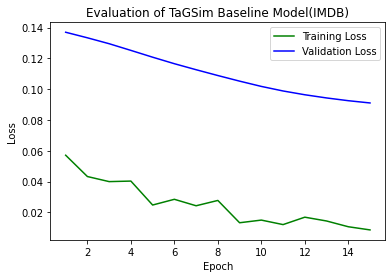


-------Model testing---------.


Model test error: 0.07040365636792212


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if(graph1_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if(graph2_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)# default: sum
      graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
      graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)


      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_in, score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Baseline Model(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#Model without NID


-------Model training---------.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Iteration 0 loss:  0.054056569933891296
Iteration 1 loss:  0.051014892756938934
Iteration 2 loss:  0.04683472216129303
Iteration 3 loss:  0.046879857778549194
Iteration 4 loss:  0.04378516599535942
Iteration 5 loss:  0.045759499073028564
Iteration 6 loss:  0.038559745997190475
Iteration 7 loss:  0.03641315922141075
Iteration 8 loss:  0.03851219639182091
Iteration 9 loss:  0.04210700591405233
Iteration 10 loss:  0.03546161949634552
Iteration 11 loss:  0.03782983124256134
Iteration 12 loss:  0.03165512904524803
Iteration 13 loss:  0.030680999159812927
Iteration 14 loss:  0.03331371024250984
Iteration 15 loss:  0.0367153026163578
Iteration 16 loss:  0.030097467824816704
Iteration 17 loss:  0.029855284839868546
Iteration 18 loss:  0.03048136830329895
Iteration 19 loss:  0.03286177416642507
Iteration 20 loss:  0.03122217208147049
Iteration 21 loss:  0.03548680245876312
Iteration 22 loss:  0.031226422637701035
Iteration 23 loss:  0.028772559016942978
Iteration 24 loss:  0.03128993883728981
I

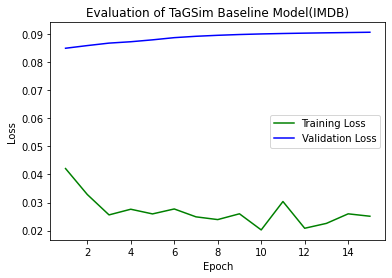


-------Model testing---------.


Model test error: 0.09214979596436024


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        # self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_in = torch.nn.Linear(8, 4)
        # self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if(graph1_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if(graph2_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)# default: sum
      graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
      graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)


      # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      # scores_in = torch.t(scores_in)

      # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Baseline Model(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MAX Pooling


-------Model training---------.

Iteration 0 loss:  0.12628981471061707
Iteration 1 loss:  0.1308736503124237
Iteration 2 loss:  0.12390418350696564
Iteration 3 loss:  0.1258573979139328
Iteration 4 loss:  0.12566497921943665
Iteration 5 loss:  0.12688492238521576
Iteration 6 loss:  0.12949281930923462
Iteration 7 loss:  0.1285911500453949
Iteration 8 loss:  0.12258028984069824
Iteration 9 loss:  0.12152093648910522
Iteration 10 loss:  0.12969329953193665
Iteration 11 loss:  0.12117205560207367
Iteration 12 loss:  0.12068643420934677
Iteration 13 loss:  0.11890845000743866
Iteration 14 loss:  0.11613453179597855
Iteration 15 loss:  0.1242954283952713
Iteration 16 loss:  0.12057875841856003
Iteration 17 loss:  0.11543092876672745
Iteration 18 loss:  0.11224902421236038
Iteration 19 loss:  0.12885522842407227
Iteration 20 loss:  0.10651315003633499
Iteration 21 loss:  0.1104431077837944
Iteration 22 loss:  0.11649541556835175
Iteration 23 loss:  0.1163434088230133
Iteration 24 loss:  0.

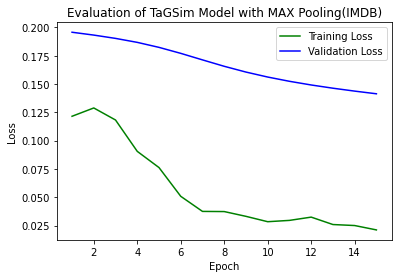


-------Model testing---------.


Model test error: 0.10831566401438544


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if graph1_hidden1[i][0] >= 10:# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if graph1_hidden2[i][0] >= 50:# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if graph2_hidden1[i][0] >= 10:# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if graph2_hidden2[i][0] >= 50:# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.max(graph1_01concat, 0)
      graph2_01pooled = torch.max(graph2_01concat, 0)
      graph1_12pooled = torch.max(graph1_12concat, 0)
      graph2_12pooled = torch.max(graph2_12concat, 0)

      graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
      graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
      graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
      graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_in, score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MAX Pooling(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MIN Pooling


-------Model training---------.

Iteration 0 loss:  0.12118370831012726
Iteration 1 loss:  0.12562806904315948
Iteration 2 loss:  0.11973835527896881
Iteration 3 loss:  0.12269765883684158
Iteration 4 loss:  0.12190108746290207
Iteration 5 loss:  0.11614497750997543
Iteration 6 loss:  0.11585038155317307
Iteration 7 loss:  0.11627326905727386
Iteration 8 loss:  0.1064031794667244
Iteration 9 loss:  0.11315175890922546
Iteration 10 loss:  0.10525640100240707
Iteration 11 loss:  0.10910685360431671
Iteration 12 loss:  0.11819104850292206
Iteration 13 loss:  0.10980746895074844
Iteration 14 loss:  0.11732365190982819
Iteration 15 loss:  0.10743038356304169
Iteration 16 loss:  0.12114939838647842
Iteration 17 loss:  0.10965895652770996
Iteration 18 loss:  0.11257431656122208
Iteration 19 loss:  0.11687317490577698
Iteration 20 loss:  0.10755234211683273
Iteration 21 loss:  0.11232852190732956
Iteration 22 loss:  0.10825321078300476
Iteration 23 loss:  0.10595335066318512
Iteration 24 loss

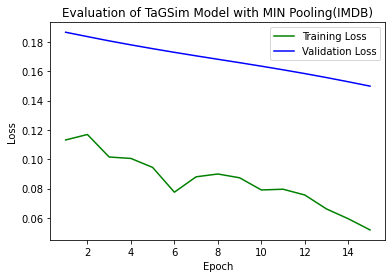


-------Model testing---------.


Model test error: 0.10819407567942108


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if(graph1_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if(graph2_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled, min_idxs = torch.min(graph1_01concat, 0)
      graph2_01pooled, min_idxs = torch.min(graph2_01concat, 0)
      graph1_12pooled, min_idxs = torch.min(graph1_12concat, 0)
      graph2_12pooled, min_idxs = torch.min(graph2_12concat, 0)

      graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
      graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
      graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
      graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_in, score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MIN Pooling(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MEAN Pooling


-------Model training---------.

Iteration 0 loss:  0.10026467591524124
Iteration 1 loss:  0.09548036009073257
Iteration 2 loss:  0.09771028161048889
Iteration 3 loss:  0.09457293152809143
Iteration 4 loss:  0.10288415104150772
Iteration 5 loss:  0.0969654768705368
Iteration 6 loss:  0.09299112111330032
Iteration 7 loss:  0.10436959564685822
Iteration 8 loss:  0.0922425165772438
Iteration 9 loss:  0.09498655796051025
Iteration 10 loss:  0.09384260326623917
Iteration 11 loss:  0.08875134587287903
Iteration 12 loss:  0.08705342561006546
Iteration 13 loss:  0.08660426735877991
Iteration 14 loss:  0.09747948497533798
Iteration 15 loss:  0.0938953086733818
Iteration 16 loss:  0.09381624311208725
Iteration 17 loss:  0.09251498430967331
Iteration 18 loss:  0.08277371525764465
Iteration 19 loss:  0.090304434299469
Iteration 20 loss:  0.08933785557746887
Iteration 21 loss:  0.08761174231767654
Iteration 22 loss:  0.08571135252714157
Iteration 23 loss:  0.08220931142568588
Iteration 24 loss:  0

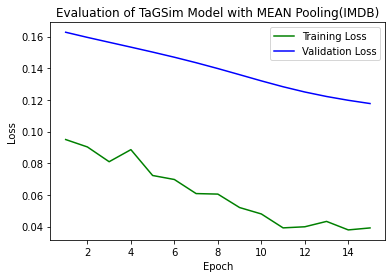


-------Model testing---------.


Model test error: 0.08894195284977156


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if(graph1_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if(graph2_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.mean(graph1_01concat, 0)
      graph2_01pooled = torch.mean(graph2_01concat, 0)
      graph1_12pooled = torch.mean(graph1_12concat, 0)
      graph2_12pooled = torch.mean(graph2_12concat, 0)

      graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
      graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
      graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
      graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_in, score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MEAN Pooling(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#SUM Pooling


-------Model training---------.

Iteration 0 loss:  0.1593770831823349
Iteration 1 loss:  0.15329834818840027
Iteration 2 loss:  0.14275172352790833
Iteration 3 loss:  0.1523127406835556
Iteration 4 loss:  0.14428897202014923
Iteration 5 loss:  0.13096500933170319
Iteration 6 loss:  0.12275111675262451
Iteration 7 loss:  0.13100720942020416
Iteration 8 loss:  0.1222509816288948
Iteration 9 loss:  0.1294388473033905
Iteration 10 loss:  0.1204586997628212
Iteration 11 loss:  0.1206701248884201
Iteration 12 loss:  0.11395935714244843
Iteration 13 loss:  0.1130850538611412
Iteration 14 loss:  0.11288636177778244
Iteration 15 loss:  0.10645580291748047
Iteration 16 loss:  0.10625042021274567
Iteration 17 loss:  0.1136157289147377
Iteration 18 loss:  0.110967718064785
Iteration 19 loss:  0.089595894018809
Iteration 20 loss:  0.10275425016880035
Iteration 21 loss:  0.10204027593135834
Iteration 22 loss:  0.1033082902431488
Iteration 23 loss:  0.10462445765733719
Iteration 24 loss:  0.0942035

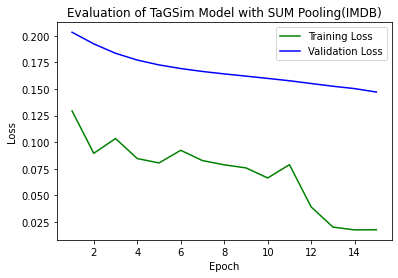


-------Model testing---------.


Model test error: 0.1017417454660344


In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 11)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 60)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def forward(self, label_multiset):
      adj_1 = torch.FloatTensor(np.array(label_multiset["edge_index_1"].todense()))
      adj_2 = torch.FloatTensor(np.array(label_multiset["edge_index_2"].todense()))
      features_1, features_2 = label_multiset["features_1"], label_multiset["features_2"]
      
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*9 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(10)])

        if(graph1_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*49 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(50)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 10):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*9 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(10)])

          if(graph2_hidden2[i][0] >= 50):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*49 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(50)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))

      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)# default: sum
      graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
      graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)


      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      scores_ec = self.tensor_network_ec(graph1_12pooled, graph2_12pooled)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

      return torch.cat([score_in, score_ec], dim=1)
        # adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
        #     np.array(label_multiset["node_index_2"].todense()))
        # edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        # node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        # edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        # #gal
        # graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        # graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        # edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        # edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        # #node level embedding Concatenation
        # graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        # graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        # graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        # graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        # #graph pooling: node Sum
        # graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        # graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        # graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        # graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        # #edge level embedding Concatenation
        # edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        # edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        # #graph pooling: edge Sum
        # edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        # edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # # scores_nc = torch.t(scores_nc)
        # #
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)

        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # # scores_ie = torch.t(scores_ie)
        # #
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        # scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        # scores_ec = torch.t(scores_ec)

        # scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        # scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        # score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        # return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 4
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.2
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with SUM Pooling(' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))